In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import model_selection, datasets
import joblib
import pickle
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import itertools

In [2]:
df = pd.read_csv("./brain_train.csv")
test_df = pd.read_csv("./brain_test.csv")
df.head()

,path,diagnose
0,./Brain scans\Tumor\TRAIN\y0.jpg,tumor
1,./Brain scans\Tumor\TRAIN\y1.jpg,tumor
2,./Brain scans\Tumor\TRAIN\y10.jpg,tumor
3,./Brain scans\Tumor\TRAIN\y100.jpg,tumor
4,./Brain scans\Tumor\TRAIN\y101.jpg,tumor


In [3]:
y_train = df['diagnose']
y_test = test_df['diagnose']

In [112]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

In [113]:
x_train = []
x_test = []
for path in df["path"]:
    x_train.append(cv2.filter2D(src=cv2.resize(cv2.imread(path), (500,500)), ddepth=-1, kernel=kernel))
for path in test_df["path"]:
    x_test.append(cv2.filter2D(src=cv2.resize(cv2.imread(path), (500,500)), ddepth=-1, kernel=kernel))

In [114]:
x_train = pd.Series(x_train)
x_test = pd.Series(x_test)

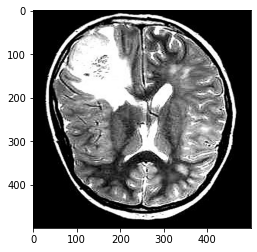

In [115]:
plt.imshow(x_train[0])

In [116]:
def Feature_extractor(image):
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(32, 32),cells_per_block=(2, 2), visualize=True, multichannel=True)
    return fd, hog_image

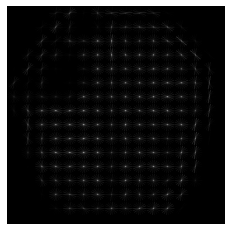

In [117]:
plt.axis("off")
fd, hog_image = Feature_extractor(x_train[1])
plt.imshow(hog_image, cmap="gray")

In [118]:
hog_features = []
hog_images = []
for image in x_train:
    fd, hog_image = Feature_extractor(image)
    hog_features.append(fd)
    hog_images.append(hog_image)

KeyboardInterrupt: 

In [ ]:
hog_features = np.array(hog_features)
hog_features.shape

In [61]:
new_df = pd.DataFrame(data = hog_features)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7046,7047,7048,7049,7050,7051,7052,7053,7054,7055
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.020467,0.010364,0.011673,0.0,0.049728,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [62]:
new_df['label'] = df['diagnose']
new_df = shuffle(new_df)

In [63]:
X_Train = new_df.loc[:, new_df.columns != 'label']
Y_Train = new_df['label']

In [64]:
test_hog_features = []
test_hog_images = []
for image in x_test:
    fd, hog_image = Feature_extractor(image)
    test_hog_features.append(fd)
    test_hog_images.append(hog_image)

In [65]:
new_test_df = pd.DataFrame(data = test_hog_features)
new_test_df['label'] = test_df['diagnose']
new_test_df = shuffle(new_test_df)
X_Test = new_test_df.loc[:, new_test_df.columns != 'label']
Y_Test = new_test_df['label']

In [82]:
rst = RandomForestClassifier(n_estimators = 72, max_features = 10)
rst.fit(X_Train, Y_Train)
rst.score(X_Train,Y_Train)

1.0

In [83]:
rst_y_pred = rst.predict(X_Test)
accuracy_score(rst_y_pred,Y_Test)

0.9

In [85]:
score = 0.0
while score < 0.94:
    rst = RandomForestClassifier(n_estimators = 72, max_features = 10)
    rst.fit(X_Train, Y_Train)
    #rst.score(X_Train,Y_Train)
    rst_y_pred = rst.predict(X_Test)
    score = accuracy_score(rst_y_pred,Y_Test)
score

KeyboardInterrupt: 